# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [22]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## 2. Load the titanic dataset from seaborn

In [23]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [24]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [25]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

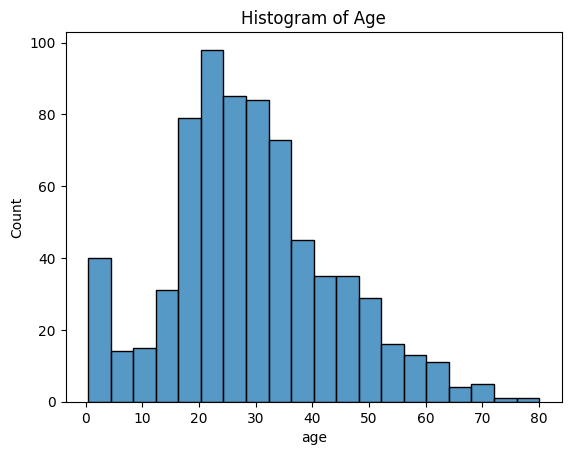

In [26]:
# create a histogram of age
sns.histplot(titanic['age'])
plt.title('Histogram of Age')
plt.show()

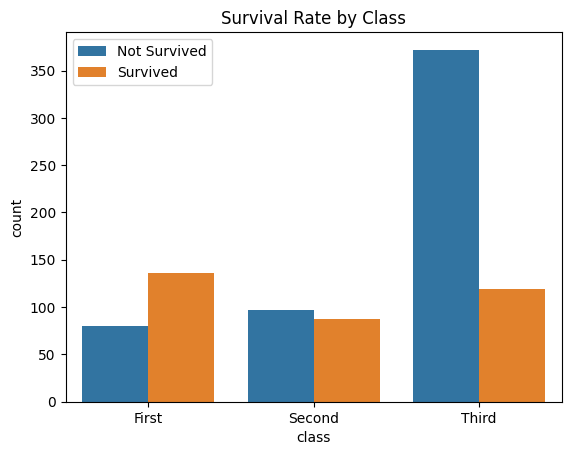

In [27]:
# create a graph that will compare survival rate by classes
sns.countplot(x='class', hue='survived', data=titanic)
#change legend so that 0 = died and 1 = lived
plt.legend(['Not Survived', 'Survived'])
plt.title('Survival Rate by Class')
plt.show()

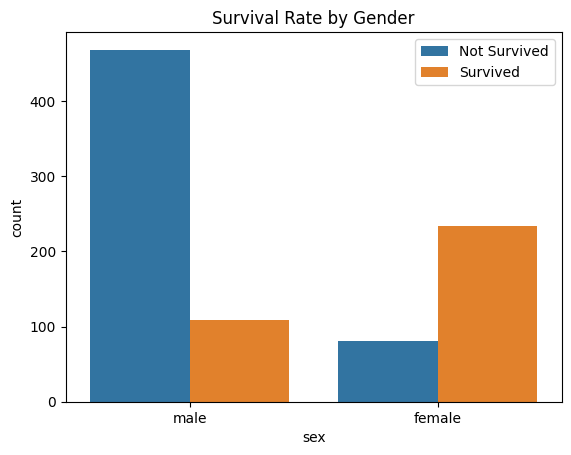

In [28]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()


### Split the data into training and testing sets

In [29]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']

# Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [30]:
# create numerical and categorical features
numerical_features = ['age','fare','pclass']
categorical_features = ['sex','embarked','who','alone']

In [31]:
#numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#categorical transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough')

## Training data with multiple models

In [32]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.7877094972067039

Model: Random Forest
Accuracy: 0.8156424581005587

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7988826815642458

Model: Gradient Boosting
Accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
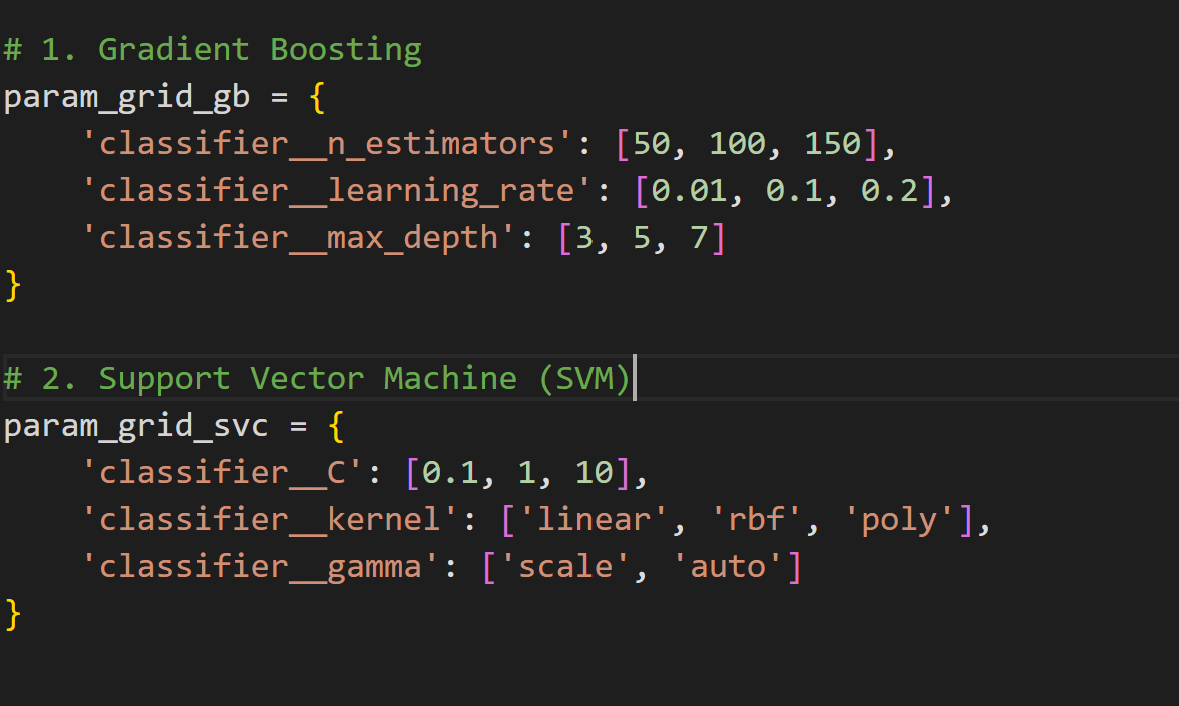

In [33]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [200, 500],
    'classifier__learning_rate': [0.01,0.1,0.2],
    'classifier__max_depth' : [3,5,7]
}

In [37]:
# Hyperparamete tuning for K-Nearest Neighbors
param_grid_knn = {
    'classifier__n_neighbors': [3,5,7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2]
}

## List of models and their corresponding parameter grids
Example
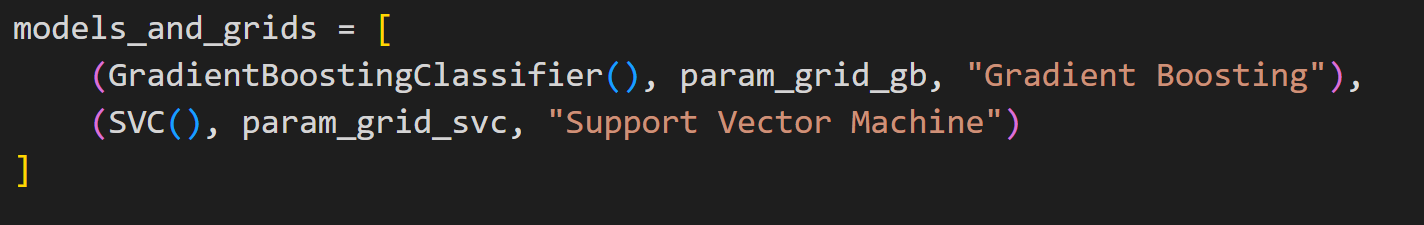

In [38]:
models_and_grids = [
    (GradientBoostingClassifier(), param_grid_gb, 'Gradient Boosting'),
    (KNeighborsClassifier(), param_grid_knn, 'K-Nearest Neighbors')
]


In [39]:
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.8314

Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8062


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

#### Reflection and Analysis
The model that performed the best without tunning was the gradient boosting classifier.
1. The model that had the highest accuracy score wihtout hypertunning was the gradient boosting classifier with an accuracy score of 0.8268
2. The two best performing models were the gradient boosting classifier as the best scoring one and the K-Nearest Neighbors as the second best classifier but not by much. Hyperparameter tunning affected the top 2 models by having the gradient bossting classifer increase by 0.01 and having the K-Nearest Neighbors classifier decrease by 0.01
3. When comparing the accuracy scores before and after tunning gradient classifer saw the best improvement of a overall score of 0.83 compared to 0.82.
4. For the gradient boosting classifier the best found parameters were
{'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}. When looking at the original range of numbers youll see that in general it seemed the the smallest value was the best param excpet with max depth with the middle value of 5. When looking at the K Nearest Neighbors classifier, the best parameters are: {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}. Uniform seemed to perform the best and having the number of nearest neighbors be the highest value of 7 seemed to perform the best and have the p be the lowest value of 1 also seemed to help the most.
5. I think that the k nearest neighbors experienced tunning after hyperparameter tuning due the accuracy score decreasing as a result. When looking at both models after tunning I would chose to use the gradient boosting classifer as it had the highest score of 0.83 which is 0.03 higher accuracy than the k nearest neighbor model. It would make sense to choose gradient boosting since it had the highest accuracy score.
6. Considering that the logestic regression model had a similar accuracy score to the k nearest neighbor classifier I would say that using that model and hyperparameter tunning it could potientally be the best option. The model is fairly readable and with that being said I think that accuracy score could be similar to then gradiant classifer meaning that the model might be overall more affective when considering other factors besides accurcay score.  